# Exemple de prétraitement 


### 1.importer les bibliothèques requises

In [10]:
import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as mplt
import seaborn as sbn


### 2.Charger le Dataset


In [14]:
 data= pnd.read_csv('FINALE.csv')
data #afficher

,0,3261.025146,1
0,1,3268.130046,1
1,2,3266.814503,1
2,3,3269.036708,1
3,4,3273.180869,1
4,5,3269.446742,1
...,...,...,...
24424,3485,3659.781414,7
24425,3486,3634.625290,7
24426,3487,3649.311442,7
24427,3488,3669.821794,7


#### faire quelques modification sur les données 

In [15]:
 #_________rennomer les colonnes__________
data=data.rename(columns = { '0':'time','3261.025146': 'ACCELERATION','1': 'activity'}) 

In [16]:
data# Lire les données.


,time,ACCELERATION,activity
0,1,3268.130046,1
1,2,3266.814503,1
2,3,3269.036708,1
3,4,3273.180869,1
4,5,3269.446742,1
...,...,...,...
24424,3485,3659.781414,7
24425,3486,3634.625290,7
24426,3487,3649.311442,7
24427,3488,3669.821794,7


In [84]:
data['activity'].value_counts() 

7    3490
6    3490
5    3490
4    3490
3    3490
2    3490
1    3489
Name: activity, dtype: int64

#### Tracer les courbes d'axélération x y z pour toutes les classes de 1 jusqu'a 7 


In [33]:
activities = data['activity'].value_counts().index
activities


Int64Index([7, 6, 5, 4, 3, 2, 1], dtype='int64')

In [34]:
Fs = 20


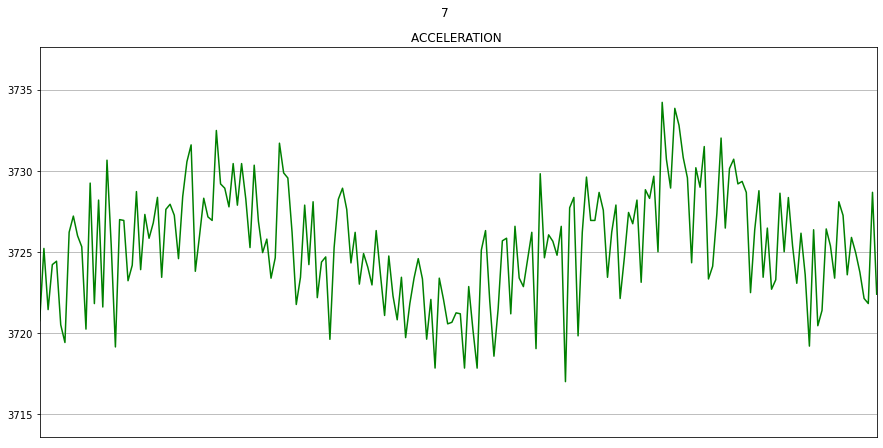

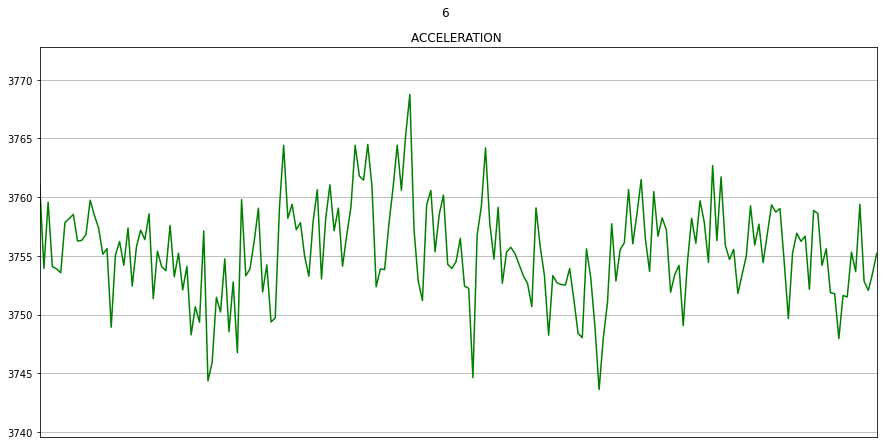

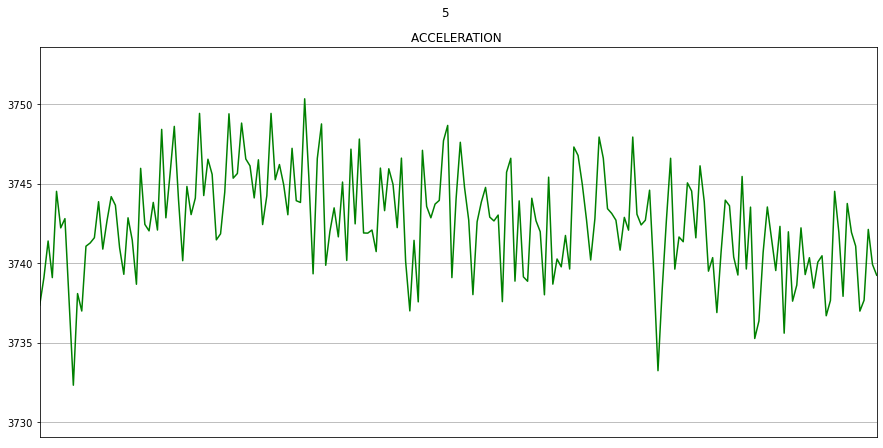

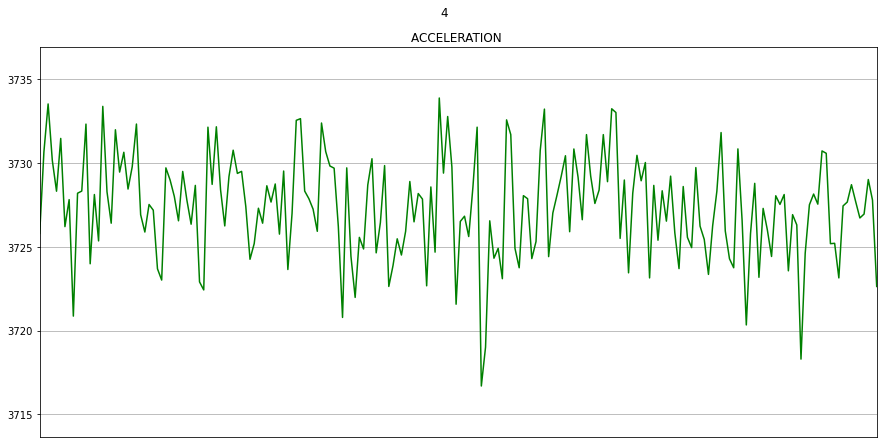

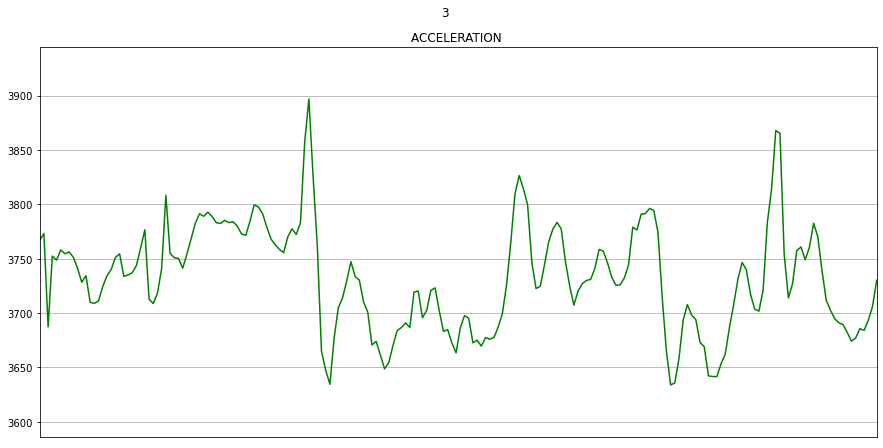

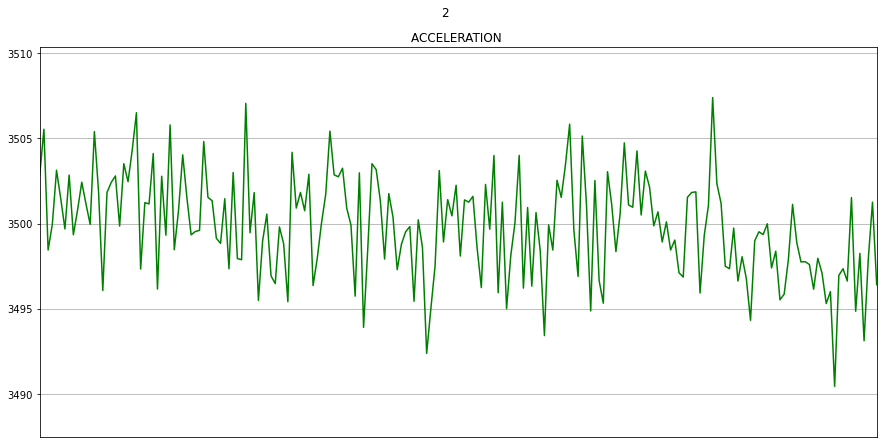

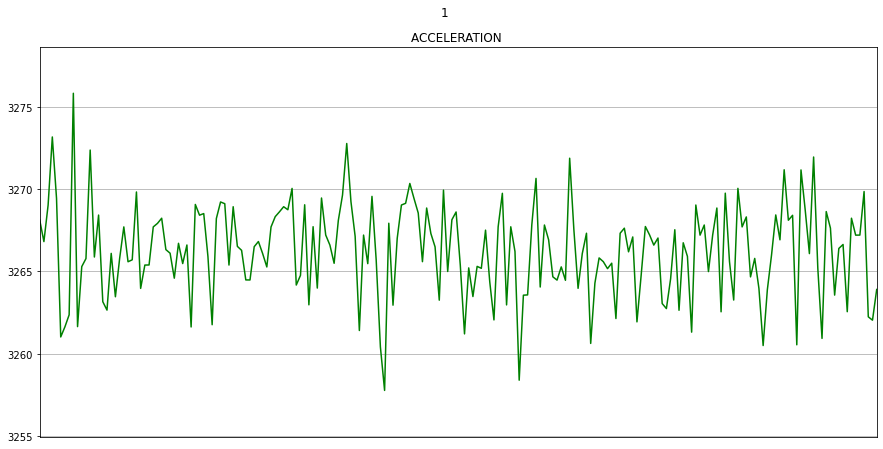

In [76]:
def plot_activity(activity, data):
    fig, (ax0) = mplt.subplots(nrows=1, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['ACCELERATION'], 'ACCELERATION ')

    mplt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    mplt.subplots_adjust(top=0.90)
    mplt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - nmp.std(y), max(y) + nmp.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

### 5.Standarisation

In [42]:
from sklearn.preprocessing import StandardScaler


In [73]:
y = data[['ACCELERATION']]
z = data['activity']
x=data['time']

In [74]:
scaler = StandardScaler()
y = scaler.fit_transform(y)

scaled_X = pnd.DataFrame(data = y, columns = ['ACCELERATION'])
scaled_X['time'] = x.values
scaled_X['activity'] = z.values
scaled_X

,ACCELERATION,time,activity
0,-2.506561,1,1
1,-2.514936,2,1
2,-2.500789,3,1
3,-2.474406,4,1
4,-2.498179,5,1
...,...,...,...
24424,-0.013200,3485,7
24425,-0.173351,3486,7
24426,-0.079855,3487,7
24427,0.050720,3488,7


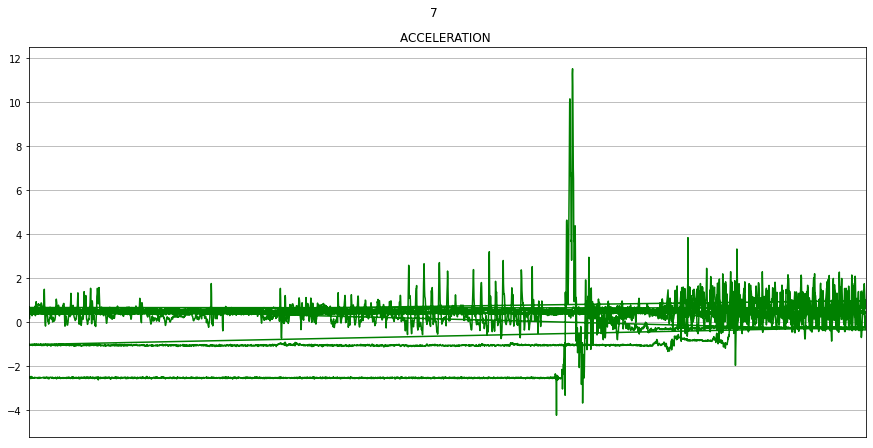

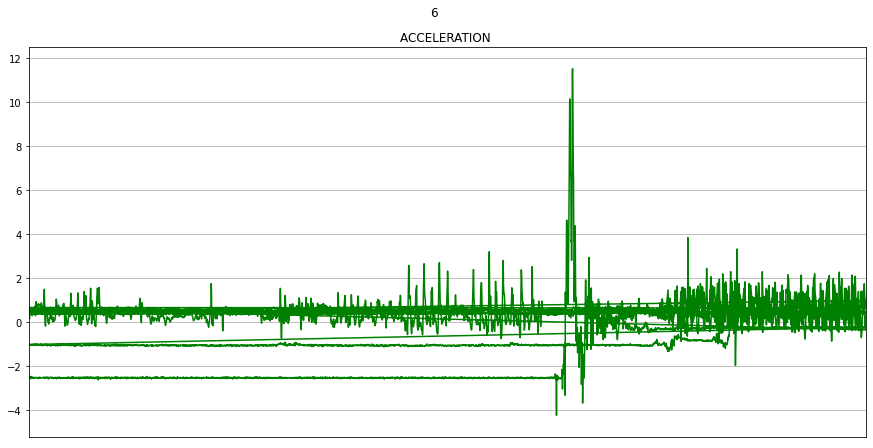

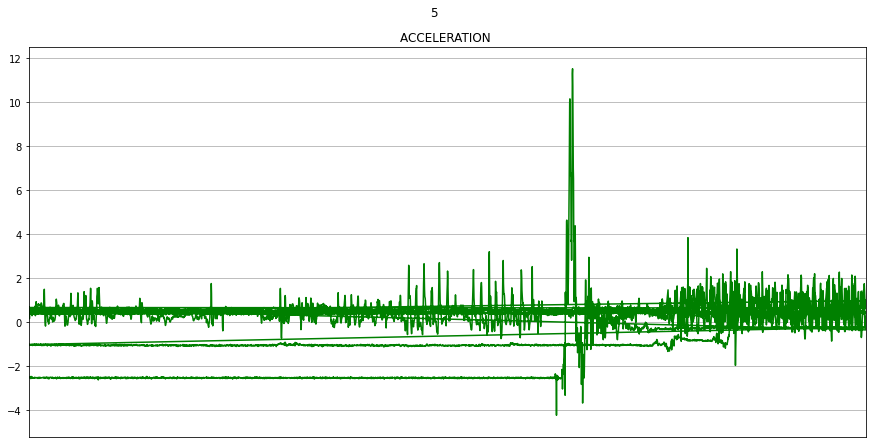

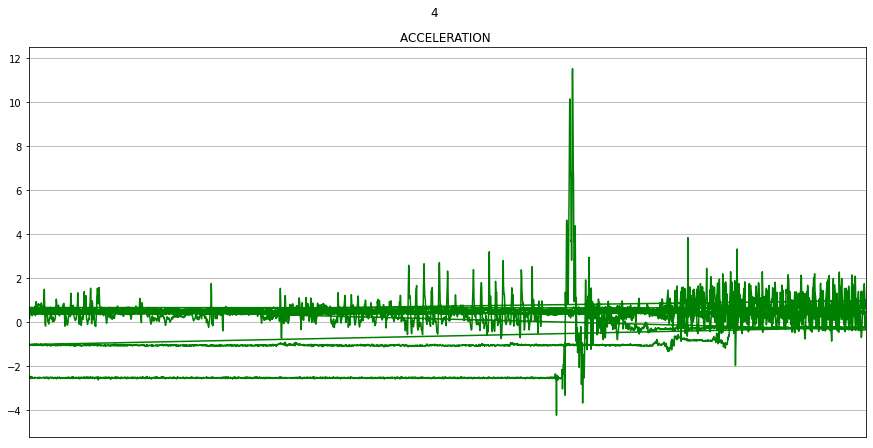

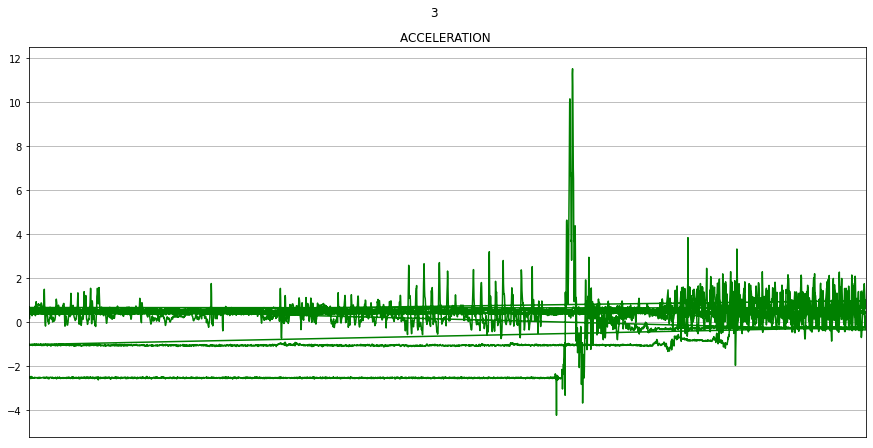

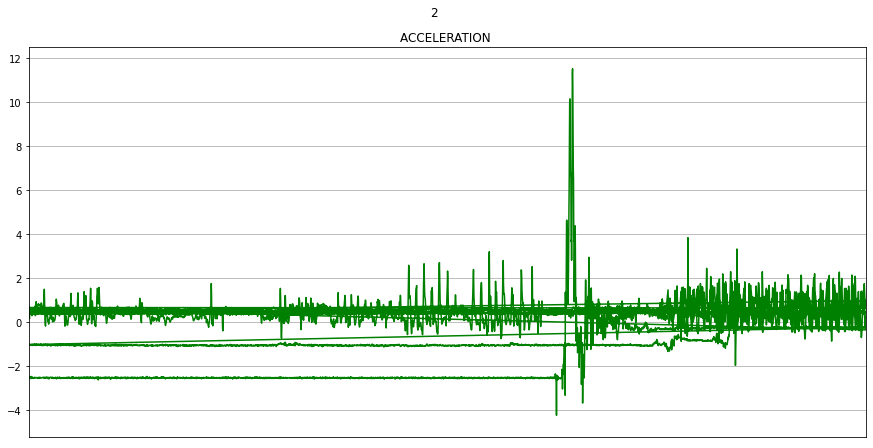

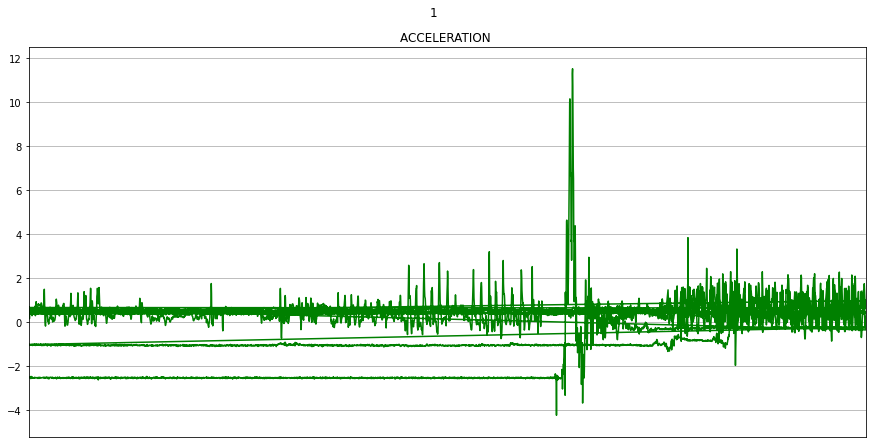

In [80]:
def plot_activity(activity, data):
    fig, (ax0) = mplt.subplots(nrows=1, figsize=(15, 7), sharex=True)
    plot_axis(ax0, scaled_X['time'], scaled_X['ACCELERATION'], 'ACCELERATION ')

    mplt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    mplt.subplots_adjust(top=0.90)
    mplt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - nmp.std(y), max(y) + nmp.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

### 6.Séparer le dataset en 2 sets

In [77]:
# Importer une fonction prévue pour séparer les sets.
from sklearn.model_selection import train_test_split


#X = data.drop('activity', axis=1)  
#y =data['activity']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

((19543, 1), (4886, 1))